Testing SymPy to Symbolics.jl conversions
Jadon Clugston
09/07/2023

In [34]:
from juliacall import Main as jl
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [22]:
jl.seval("using Symbolics")
jl.seval("using ModelingToolkit")
jl.seval("using SymPyPythonCall")
jl.seval("using DifferentialEquations")

In [10]:
import juliapkg

In [11]:
juliapkg.resolve()

True

In [12]:
fol = sp.sympify("Eq(Derivative(x(t),t), (1 - x(t))/3.0)")

In [13]:
jl.pyconvert(jl.Symbolics.Equation,fol)

0.3333333333333333 - 0.3333333333333333x(t) ~ Differential(t)(x(t))

In [14]:
fol

Eq(Derivative(x(t), t), 0.333333333333333 - 0.333333333333333*x(t))

In [14]:
jl.pyconvert(jl.Symbolics.Equation,fol)

0.3333333333333333 - 0.3333333333333333x(t) ~ Differential(t)(x(t))

In [15]:
vars = jl.Symbolics.get_variables(fol)

In [17]:
odesys = jl.ODESystem(fol,jl.arguments(vars[0])[0], name = jl.Symbol("odesys"))

In [18]:
simplified = jl.structural_simplify(odesys)

In [20]:
prob = jl.ODEProblem(simplified,jl.pyconvert(jl.Vector,[jl.pyconvert(jl.Float64,0.0)]), jl.pyconvert(jl.Vector,(jl.pyconvert(jl.Float64,0.0),jl.pyconvert(jl.Float64,10.0))))

In [23]:
sol = jl.solve(prob,jl.Tsit5())

In [35]:
intersol = sol(np.arange(0,10,0.01))

In [42]:
tnums = intersol.t

In [44]:
solnums = jl.reduce(jl.vcat,intersol.u)

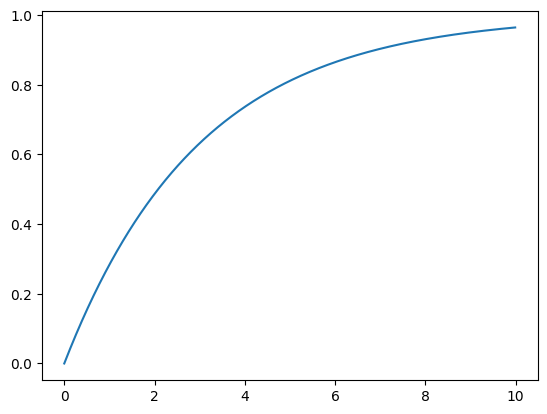

In [45]:
plt.plot(tnums,solnums)

In [98]:
spsys = sp.sympify("[Eq(Derivative(x(t),t), (1 - x(t))/3.0), Eq(Derivative(y(t),t), (1 + y(t))/3.0)]")

In [99]:
sysvar1 = jl.Symbolics.get_variables(spsys[0])
sysvar2 = jl.Symbolics.get_variables(spsys[1])

In [100]:
odebigsys = jl.ODESystem(spsys,jl.arguments(sysvar1[0])[0], name = jl.Symbol("odesys"))

In [101]:
bigsimplified = jl.structural_simplify(odebigsys)

In [102]:
bigprob = jl.ODEProblem(bigsimplified,jl.pyconvert(jl.Vector,[jl.pyconvert(jl.Float64,0.0),jl.pyconvert(jl.Float64,0.1)]), jl.pyconvert(jl.Vector,(jl.pyconvert(jl.Float64,0.0),jl.pyconvert(jl.Float64,10.0))))

In [103]:
bigsol = jl.solve(bigprob,jl.Tsit5())

In [104]:
bigsol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 12-element Vector{Float64}:
  0.0
  0.0029701208832612833
  0.032671329715874116
  0.23808000868921736
  0.7092847935693931
  1.401441340697768
  2.2826148488430587
  3.4063606967843505
  4.763168498113075
  6.370941753177284
  8.218989222543868
 10.0
u: 12-element Vector{Vector{Float64}}:
 [0.0, 0.1]
 [0.0009895503662243625, 0.1010895836006979]
 [0.010831357047777932, 0.1120449559713058]
 [0.076292672726754, 0.19085338779025618]
 [0.21055748766448987, 0.393388352429212]
 [0.37321211409603927, 0.7549797055553776]
 [0.5327409726024249, 1.354154848207483]
 [0.6787234507647881, 2.423843228291658]
 [0.7956090187710207, 4.3818525574459795]
 [0.880404393773177, 8.19772431378179]
 [0.9354063480333682, 16.02987735023362]
 [0.9643247203754745, 29.834602742421904]

In [105]:
bigsol.t

12-element Vector{Float64}:
  0.0
  0.0029701208832612833
  0.032671329715874116
  0.23808000868921736
  0.7092847935693931
  1.401441340697768
  2.2826148488430587
  3.4063606967843505
  4.763168498113075
  6.370941753177284
  8.218989222543868
 10.0

In [106]:
bigsolnums = jl.reduce(jl.hcat,bigsol.u)

In [107]:
bigsolx = bigsolnums[0,:]

In [108]:
bigsoly = bigsolnums[1,:]

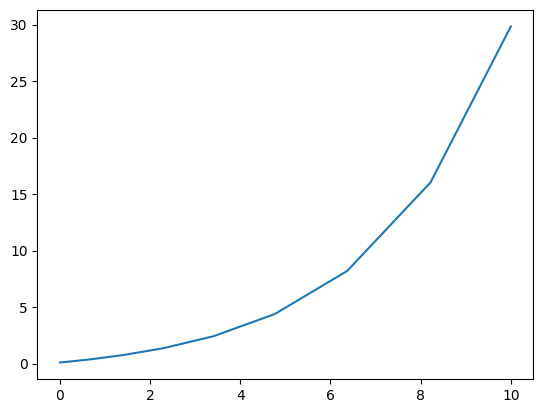

In [109]:
plt.plot(bigsol.t,bigsoly)

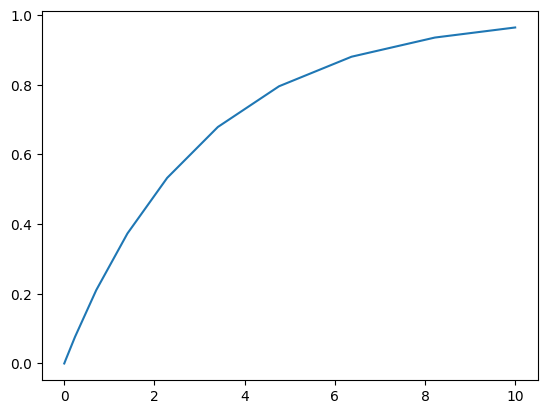

In [110]:
plt.plot(bigsol.t,bigsolx)